In [ ]:
"""
Необходимо перевести на лодке крестьянина, козу, качан капусты и волка.
Ограничения: На берегу нельзя оставлять волка и козу, козу и капусту.
W - волк
C - капуста
F - крестьянин
G - коза
"""
def WCPG():
    left_coast = ["W", "C", "G"]
    right_coast = list()
    restriction = [{"W", "G"}, {"G", "C"}] # наши ограничения
    boat = ["F"]
    while len(left_coast):
        boat.append(left_coast.pop(0))
        if set(left_coast) in restriction:
            left_coast.append(boat.pop())
            continue
        right_coast.extend(boat)
        boat.pop()
        right_coast.remove("F")
        if set(right_coast) in restriction:
            boat.append(right_coast.pop(0))
            left_coast.append(boat.pop())
        print(left_coast, "____", boat, "____", right_coast)
    right_coast.append(boat.pop())
    print(left_coast, "____", boat, "____", right_coast)


    WCPG()

In [1]:
'''
    Дан пазл в котором указано начальное и конечное состояние.
    Необходимо написать алгоритм, реализующий оптимальный поиск в заданном пазлe из начального состояния в конечное, используя алгоритм А*.
    В качестве эвристики использовать количество чисел стоящих не на своих местах.

'''
from copy import deepcopy


class Node:
    '''
    Создадим класс узла. 
    Содержит информацию о вершине родителе, актуальное положение, 
    стоимость.
    g - стоимость от начальной вершины до выбранной
    h - расстояние от начала вершины до текущей
    f - суммарная стоимость f = g + h
    '''
    def __init__(self, position=None, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, node):
        return self.position == node.position


def print_field(node: Node):
    queue = [node.position]
    while node.parent:
        node = node.parent
        queue.append(node.position)
    while queue:
        position = queue.pop()
        print('-----')
        for i in range(len(position)):
            print(*position[i])
        print('-----')
    print('\n')


def find_num(num, position):
    n = len(position)
    for i in range(n):
        for j in range(n):
            if position[i][j] == num:
                return i, j


def heuristic(node: Node, final_Node: Node):
    h = 0
    n = len(node.position)
    for i in range(n):
        for j in range(n):
            if node.position[i][j] != final_Node.position[i][j]:
                h += 1
    return h



def search_A_star_alg(start, stop):
    start_Node = Node(start)
    final_Node = Node(stop)
    start_Node.g = 0
    start_Node.h = heuristic(start_Node, final_Node)
    start_Node.f = start_Node.g + start_Node.h

    visited_Node = []
    not_visit_Node = []
    visited_Node.append(start_Node)

    move = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    while visited_Node:
        current_Node = visited_Node[0]
        current_index = 0
        for index, node in enumerate(visited_Node):
            if node.f < current_Node.f:
                current_index = index
                current_Node = node
        visited_Node.pop(current_index)
        not_visit_Node.append(current_Node)

        if current_Node == final_Node:
            return print_field(current_Node)
        i, j = find_num(0, current_Node.position)
        for new_position in move:
            new_i = i + new_position[0]
            new_j = j + new_position[1]
            n = len(current_Node.position)
            if (new_i > n - 1) or (new_i < 0) or (new_j > n - 1) or (new_j < 0):
                continue
            else:
                new_Node = Node(deepcopy(current_Node.position), current_Node)
                new_Node.position[i][j], new_Node.position[new_i][new_j] = new_Node.position[new_i][new_j], 0
                new_Node.h = heuristic(new_Node, final_Node)
                new_Node.g = current_Node.g + 1
                new_Node.f = new_Node.h + new_Node.g
                if new_Node not in not_visit_Node:
                    visited_Node.append(new_Node)


#Задаём начальное поле и финальное
Intial_State = [[2, 8, 3], [1, 6, 4], [7, 0, 5]]
Final_State = [[1, 2, 3], [8, 0, 4], [7, 6, 5]]
search_A_star_alg(Intial_State, Final_State)

-----
2 8 3
1 6 4
7 0 5
-----
-----
2 8 3
1 0 4
7 6 5
-----
-----
2 0 3
1 8 4
7 6 5
-----
-----
0 2 3
1 8 4
7 6 5
-----
-----
1 2 3
0 8 4
7 6 5
-----
-----
1 2 3
8 0 4
7 6 5
-----




In [ ]:
'''
Training Iris
'''

In [98]:
# Add necessary library
import seaborn 
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import os
from copy import deepcopy 


In [43]:

# import some data to play with
iris = datasets.load_iris()
iris.data[:] # Show data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
# Name of variable
print(iris.feature_names) 
# See target
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

In [73]:
iris_frame

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target       name  
0         0     setosa  
1         0     setosa  
2         0     setosa  
3         0     setosa  
4         0     setosa  
..      ...        ...  
145       2  virginica  
146       2  virginica  
147       2  virginica  
148       2  virginica  
149       2  virginica  

[150 rows x 6 columns]

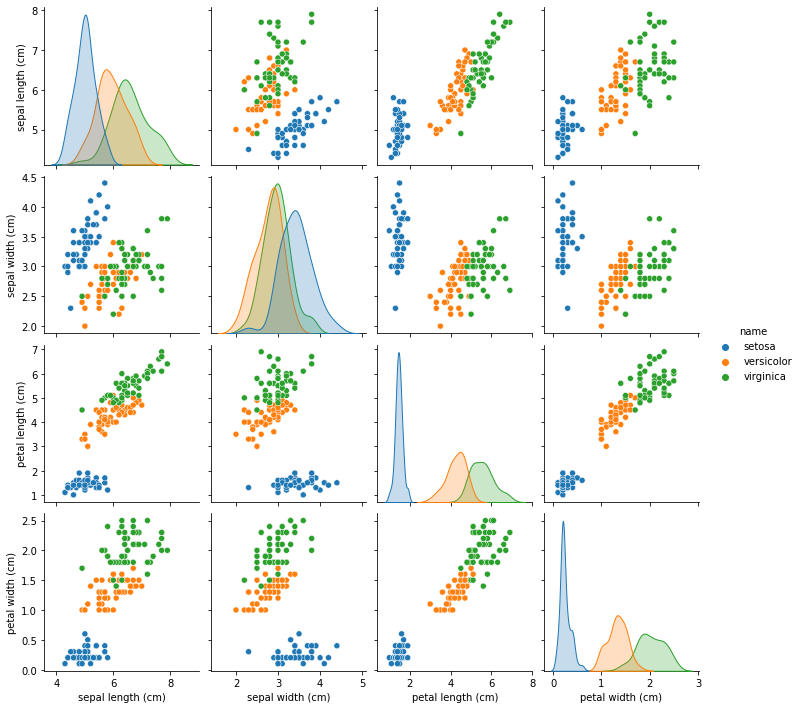

In [74]:
seaborn.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'name']], hue='name')

In [ ]:
Метод классификации SVM

In [ ]:
Делим выборку на обучаемую и тестовую в пропорции 80:20 

In [90]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.2, random_state = 0)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print (sklearn.metrics.accuracy_score(test_labels, model_predictions))
print (sklearn.metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      1.00      0.93        13
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [93]:
Метод К-соседей. Соотношение выборки 80:20

SyntaxError: invalid syntax (<ipython-input-93-ef47b11d71f7>, line 1)

In [120]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.2)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print (sklearn.metrics.accuracy_score(test_labels, model_predictions))
print (sklearn.metrics.classification_report(test_labels, model_predictions))

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.69      0.90      0.78        10
           2       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.87      0.88      0.87        30
weighted avg       0.86      0.83      0.83        30

